### Diferentes modelos para diferentes problemas

Algunos principios rectores:

#### Tamaño del conjunto de datos
- Menos características = modelo más simple, tiempo de entrenamiento más rápido
- Algunos modelos requieren grandes cantidades de datos para un buen rendimiento

#### Interpretabilidad
- Algunos modelos son más fáciles de explicar, lo cual puede ser importante para las partes interesadas
- La regresión lineal tiene una alta interpretabilidad, ya que podemos comprender los coeficientes

#### Flexibilidad
- Puede mejorar la precisión al hacer menos suposiciones sobre los datos
- KNN es un modelo más flexible que no asume relaciones lineales

### Todo está en las métricas

#### Rendimiento del modelo de regresión:

- RMSE
- R cuadrado

#### Rendimiento del modelo de clasificación:

- Precisión
- Matriz de confusión
- Precisión, recall, puntuación F1
- AUC ROC

Entrene varios modelos y evalúe su rendimiento de forma inmediata

### Nota sobre el escalado

Modelos afectados por el escalado:

- KNN
- Regresión lineal (más Ridge, Lasso)
- Regresión logística
- Red neuronal artificial

Es recomendable escalar los datos antes de evaluar los modelos.

/var/folders/3b/5qvcm87x78317tw750jb2ykh0000gn/T/ipykernel_54626/4090332277.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=models.keys())


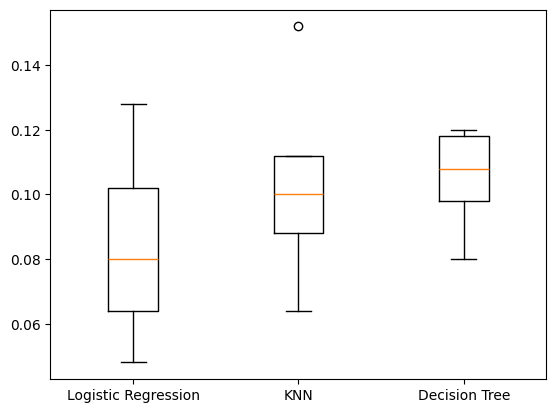

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

df = pd.read_csv('../data/music.csv')

X = df.drop("genre", axis=1).values
y = df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
            "Logistic Regression": LogisticRegression(), 
            "KNN": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier()
         }
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels=models.keys())
plt.show()

La línea naranja significa puntuación mediana y muestra que Decision Tree tiene mejor punruación mediana.